# **Plotting residuals for the 2D airfoil case**

1. No wall function

2. With wall function (nutUSpaldingWallFunction)

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
model = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
solverInfo_path = [run + 'airfoil/airFoil2D_Re3e6_alpha0_noWallFunc_3rd/yplus_{}/solverInfo_{}_{}.csv'.format(yp[j], model, yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data = [pd.read_csv(solverInfo_path[i + len(res_list)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,nuTilda_solver,nuTilda_initial,nuTilda_final,nuTilda_iters,nuTilda_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.097233,2,1.000000,0.027058,4,False,smoothSolver,1.000000,0.026792,2,True,GAMG,1.000000,0.094198,61,True
1,2,smoothSolver,0.146395,0.006956,6,0.679412,0.029176,6,False,smoothSolver,0.114915,0.011034,2,True,GAMG,0.014374,0.001399,30,True
2,3,smoothSolver,0.008311,0.000442,6,0.179957,0.009704,6,False,smoothSolver,0.042584,0.001903,4,True,GAMG,0.097847,0.009432,46,True
3,4,smoothSolver,0.008566,0.000412,6,0.184642,0.008261,6,False,smoothSolver,0.025084,0.001462,4,True,GAMG,0.004728,0.000446,46,True
4,5,smoothSolver,0.067208,0.003408,6,0.167240,0.007795,6,False,smoothSolver,0.018791,0.001305,4,True,GAMG,0.006704,0.000658,75,True


In [4]:
solverInfo_path2 = [run + 'airfoil/airFoil2D_Re3e6_alpha0_withWallFunc_3rd/yplus_{}/solverInfo_{}_{}.csv'.format(yp[j], model, yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data2 = [pd.read_csv(solverInfo_path2[i + len(res_list)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data2[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,nuTilda_solver,nuTilda_initial,nuTilda_final,nuTilda_iters,nuTilda_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.097219,2,1.000000,0.027054,4,False,smoothSolver,1.000000,0.026792,2,True,GAMG,1.000000,0.094198,61,True
1,2,smoothSolver,0.146393,0.006956,6,0.679411,0.029176,6,False,smoothSolver,0.114915,0.011034,2,True,GAMG,0.014374,0.001399,30,True
2,3,smoothSolver,0.008311,0.000442,6,0.179957,0.009704,6,False,smoothSolver,0.042584,0.001903,4,True,GAMG,0.097847,0.009432,46,True
3,4,smoothSolver,0.008566,0.000412,6,0.184643,0.008261,6,False,smoothSolver,0.025084,0.001462,4,True,GAMG,0.004728,0.000446,46,True
4,5,smoothSolver,0.067207,0.003408,6,0.167240,0.007795,6,False,smoothSolver,0.018791,0.001305,4,True,GAMG,0.006704,0.000658,75,True


In [5]:
Ux_init_res = [solverInfo_data[i + len(res_list)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(res_list))]
Uy_init_res = [solverInfo_data[i + len(res_list)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(res_list))]
p_init_res = [solverInfo_data[i + len(res_list)*j]['p_initial'] for j in range(len(yp)) for i in range(len(res_list))]
nuTilda_init_res = [solverInfo_data[i + len(res_list)*j]['nuTilda_initial'] for j in range(len(yp)) for i in range(len(res_list))]
t = [solverInfo_data[i + len(res_list)*j]['Time'] for j in range(len(yp)) for i in range(len(res_list))]

In [6]:
Ux_init_res2 = [solverInfo_data2[i + len(res_list)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(res_list))]
Uy_init_res2 = [solverInfo_data2[i + len(res_list)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(res_list))]
p_init_res2 = [solverInfo_data2[i + len(res_list)*j]['p_initial'] for j in range(len(yp)) for i in range(len(res_list))]
nuTilda_init_res2 = [solverInfo_data2[i + len(res_list)*j]['nuTilda_initial'] for j in range(len(yp)) for i in range(len(res_list))]
t2 = [solverInfo_data2[i + len(res_list)*j]['Time'] for j in range(len(yp)) for i in range(len(res_list))]

## Plot

1. No wall function

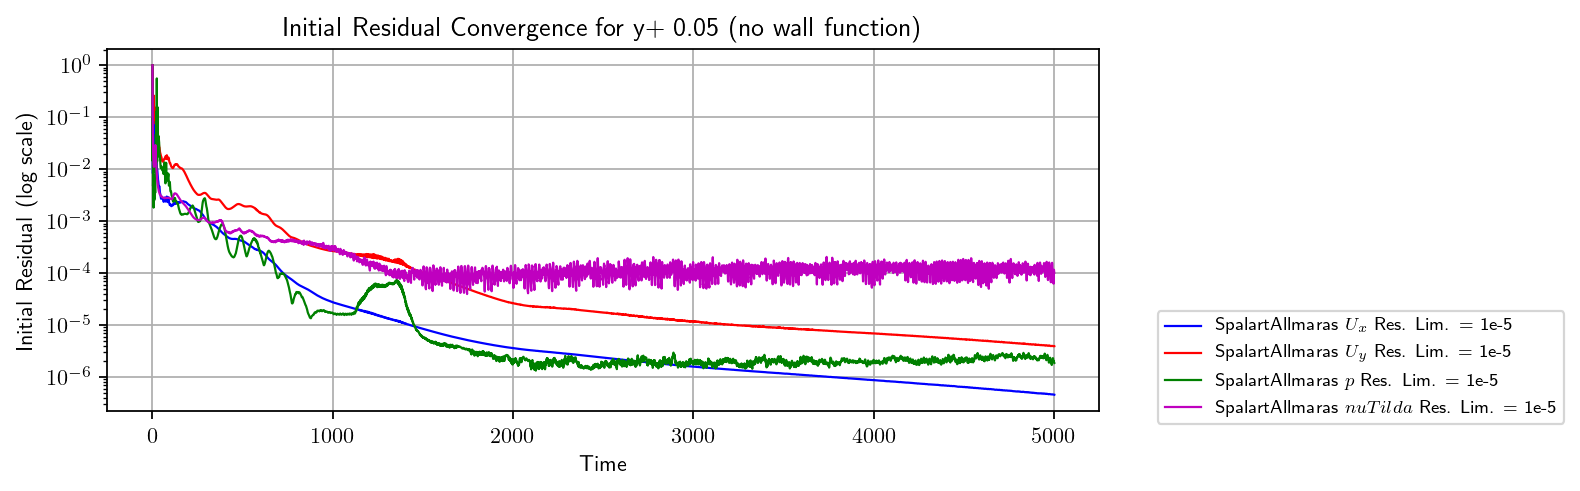

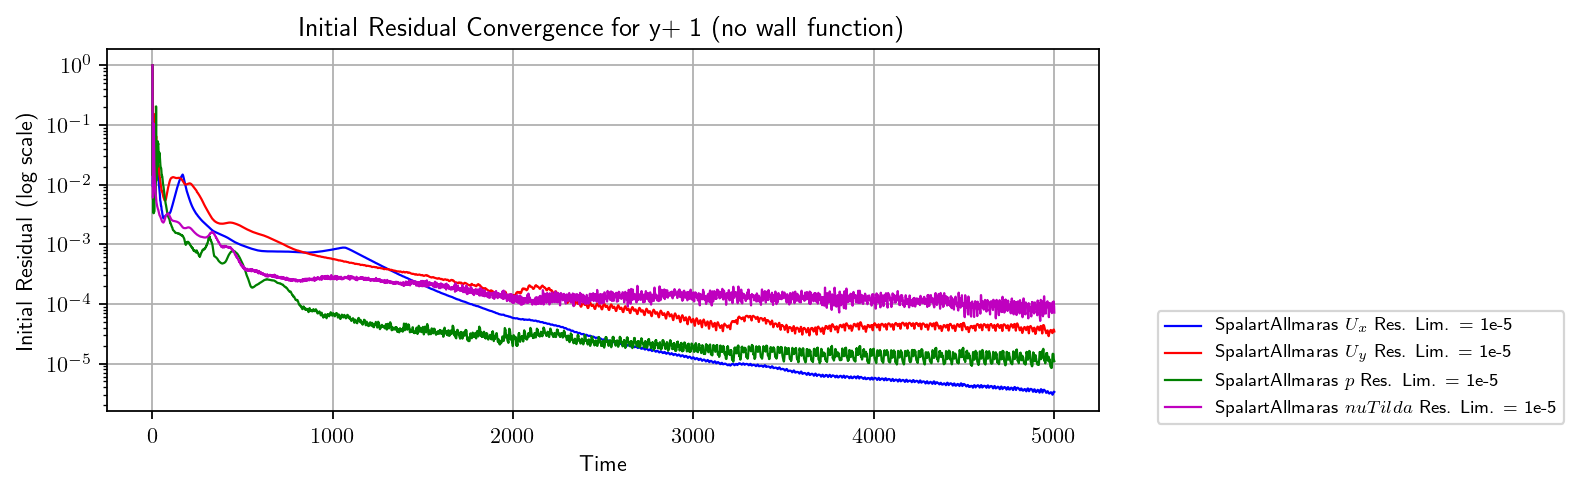

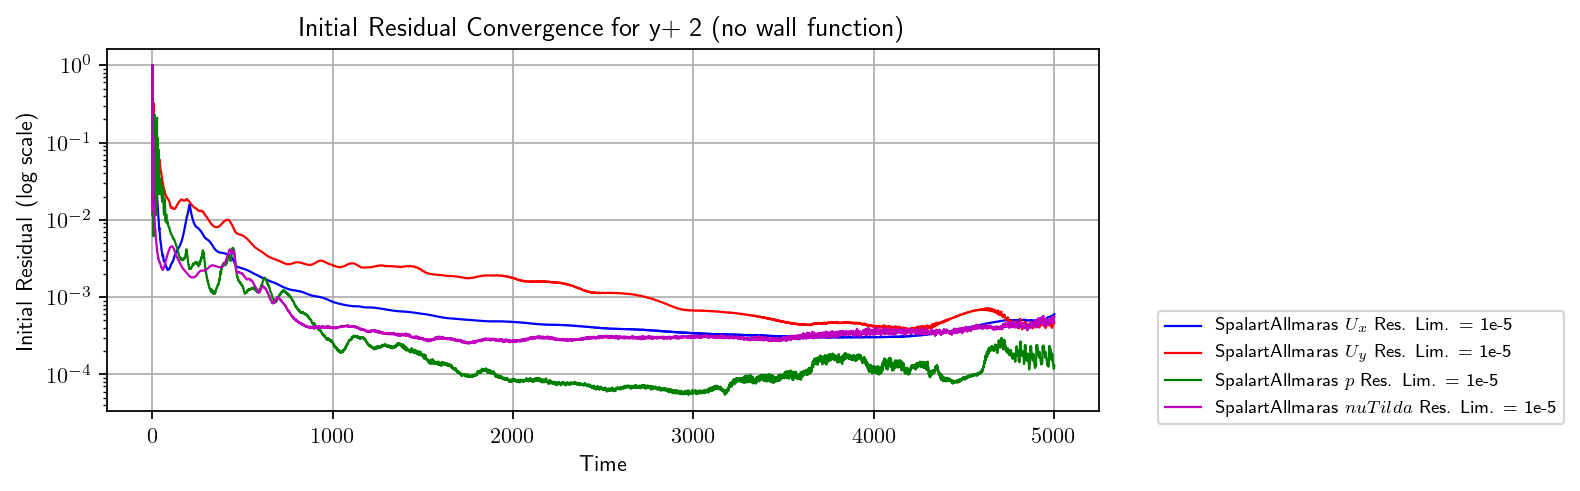

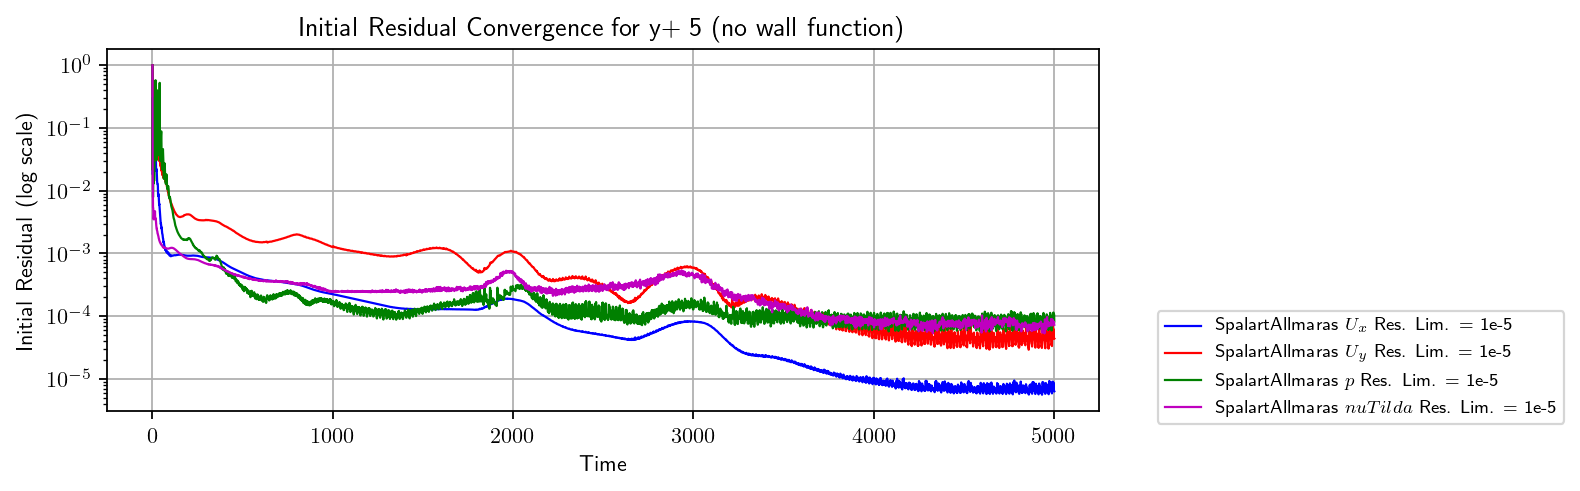

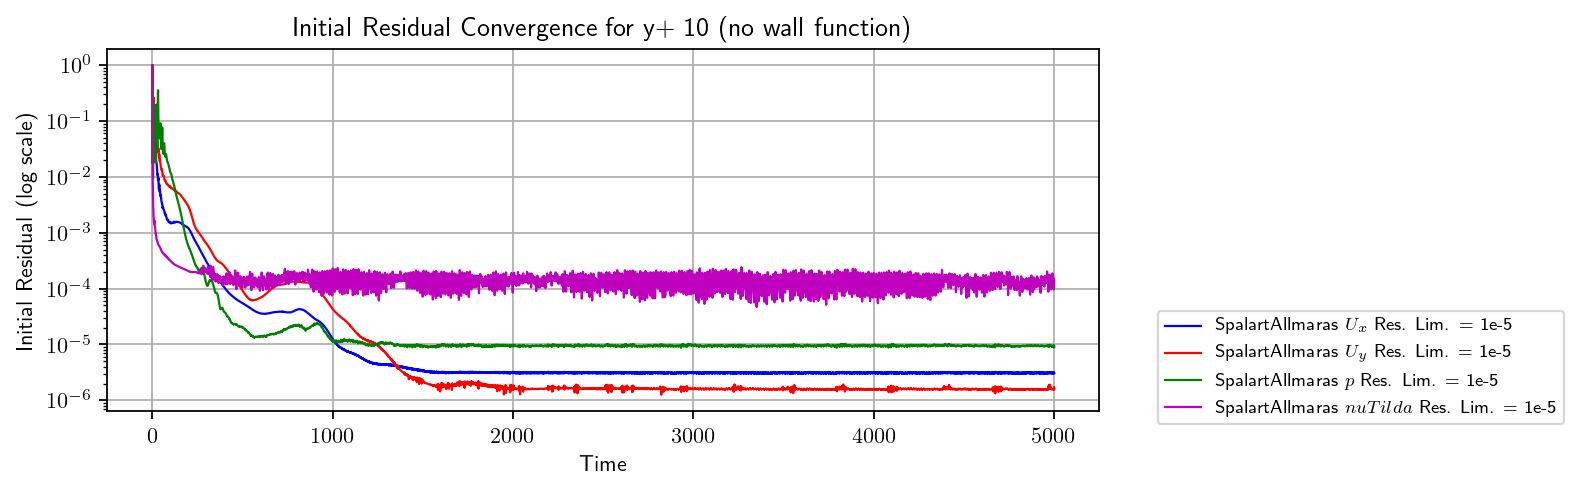

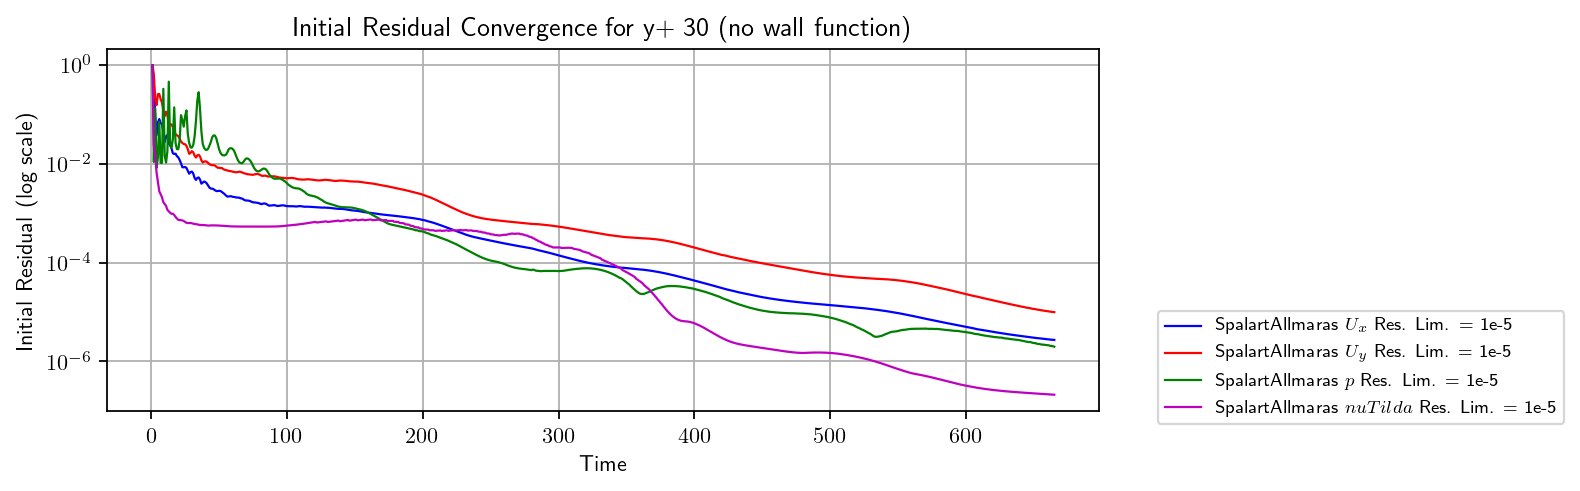

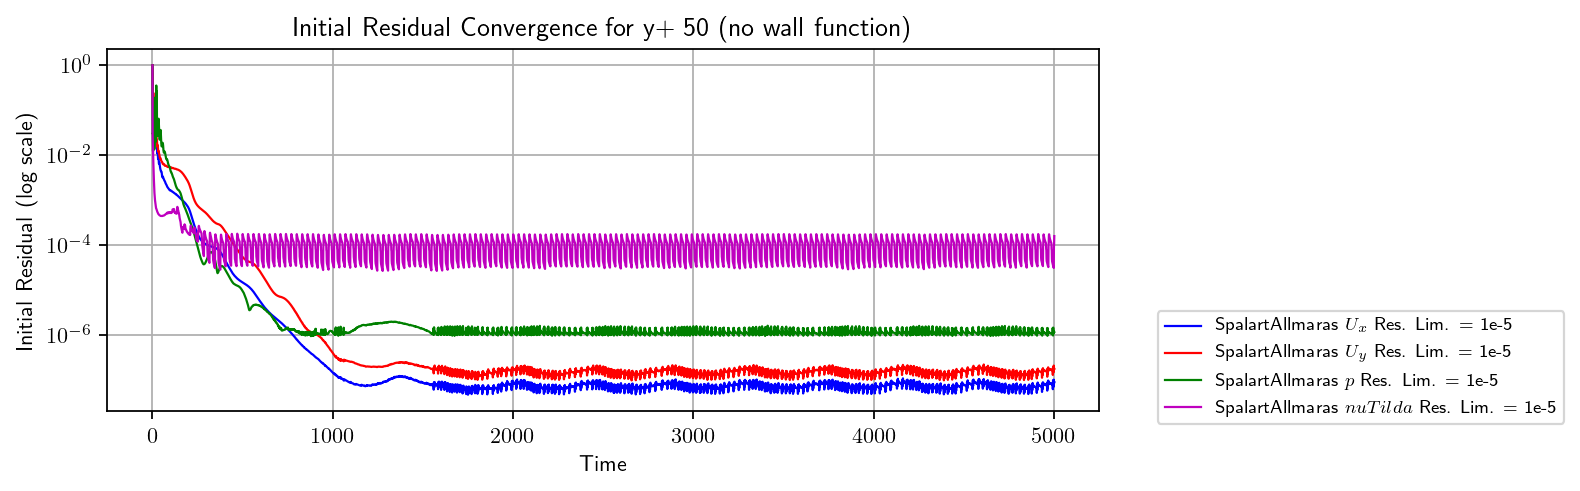

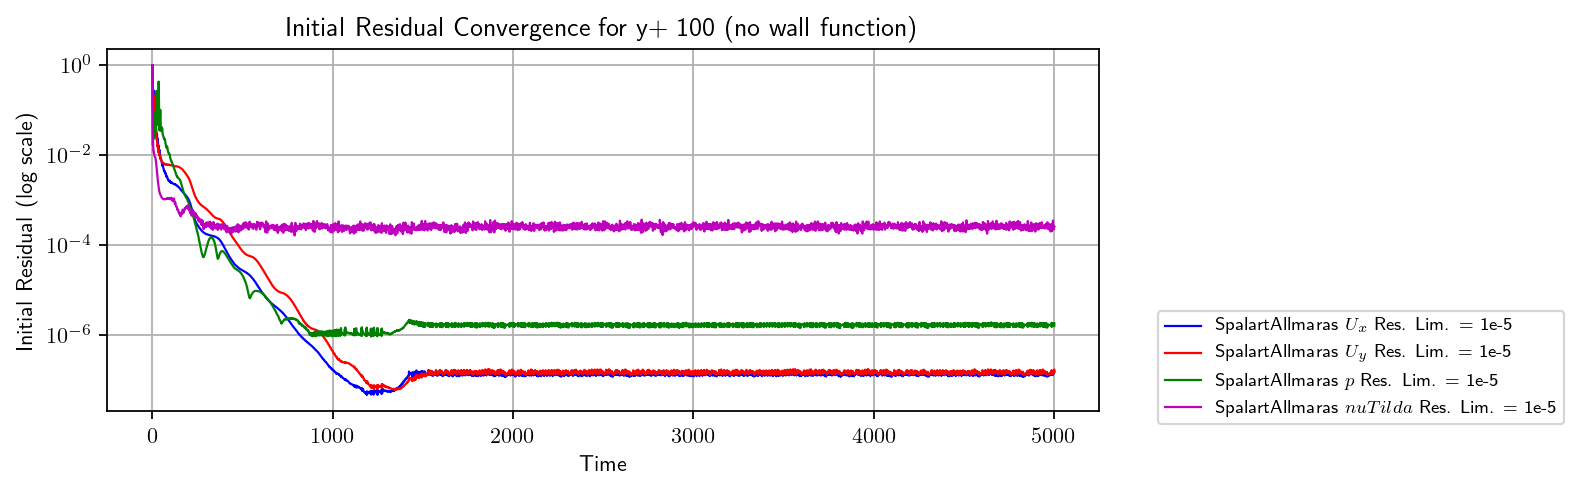

In [10]:
lw = 1.0
for j in range(len(yp)):
    for i in range(len(res_list)):
        fig, ax = plt.subplots(1, 1, figsize=(8, 3))
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence for y+ {} (no wall function)".format(yp[j]))
        ax.set_xlabel("Time")
        ax.set_ylabel("Initial Residual (log scale)")
        ax.plot(t[i + len(res_list)*j], Ux_init_res[i + len(res_list)*j], color = 'b', label = "{} $U_x$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], Uy_init_res[i + len(res_list)*j], color = 'r', label = "{} $U_y$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], p_init_res[i + len(res_list)*j], color = 'g', label = "{} $p$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], nuTilda_init_res[i + len(res_list)*j], color = 'm', label = "{} $nuTilda$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.3))

2. With wall function

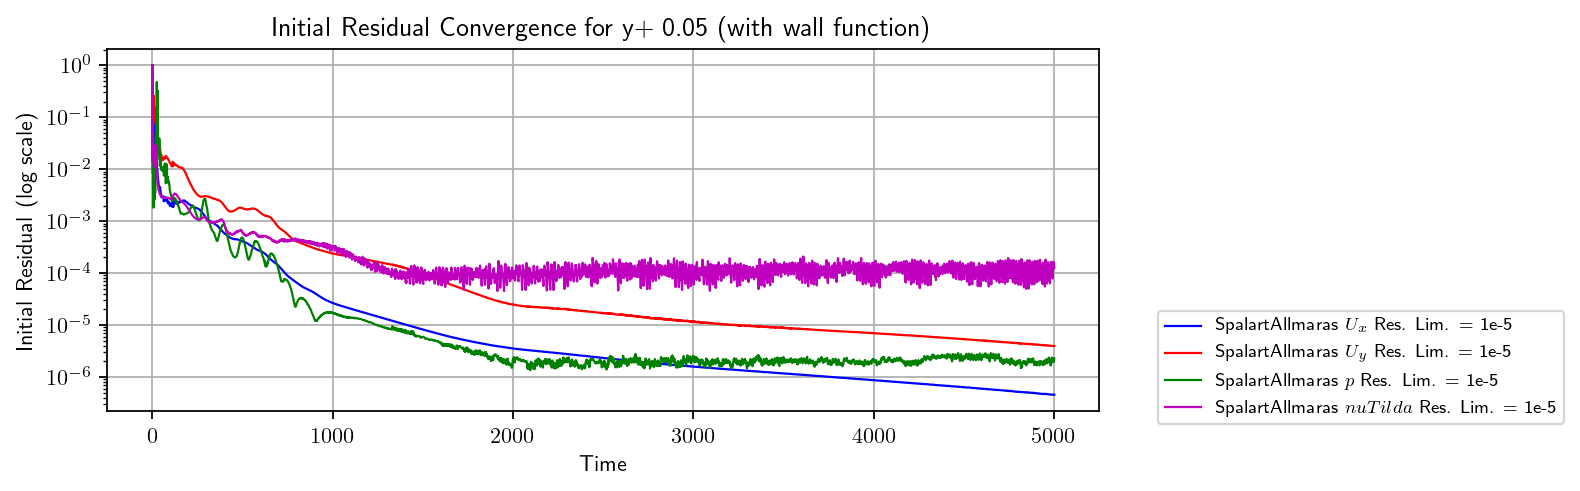

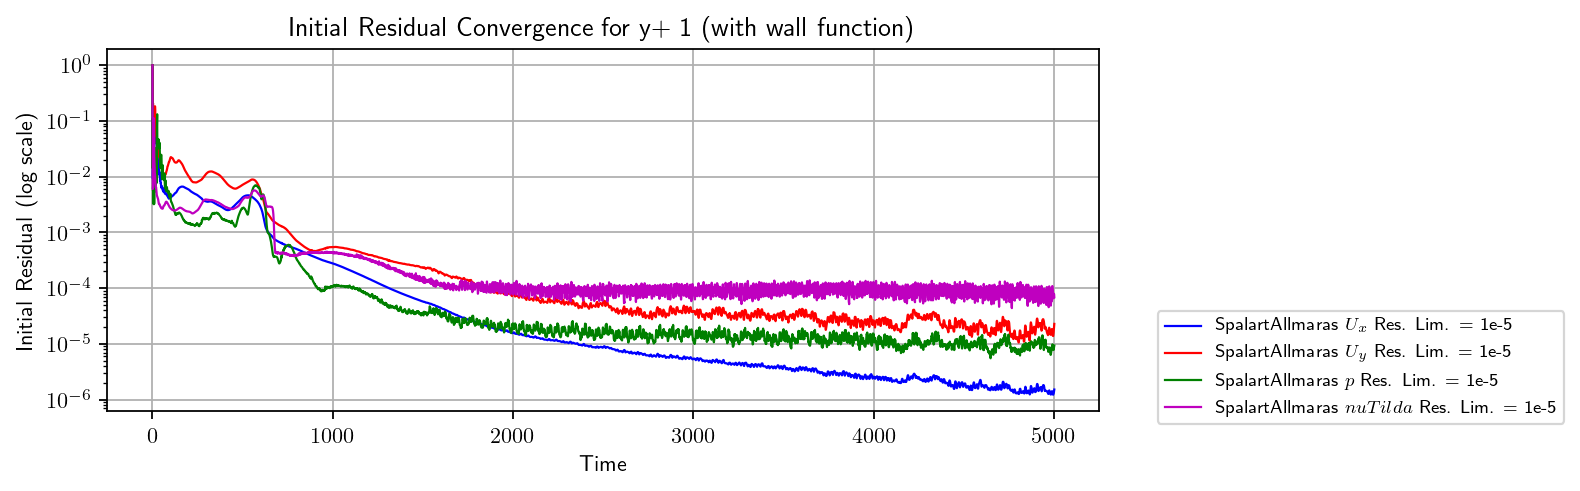

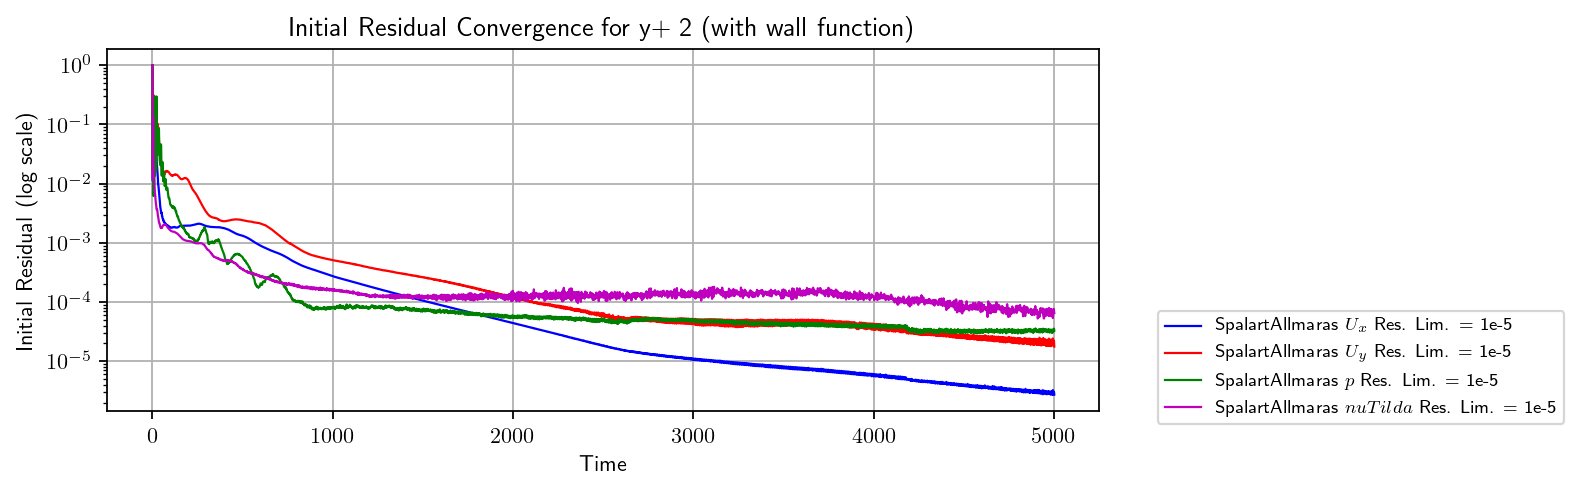

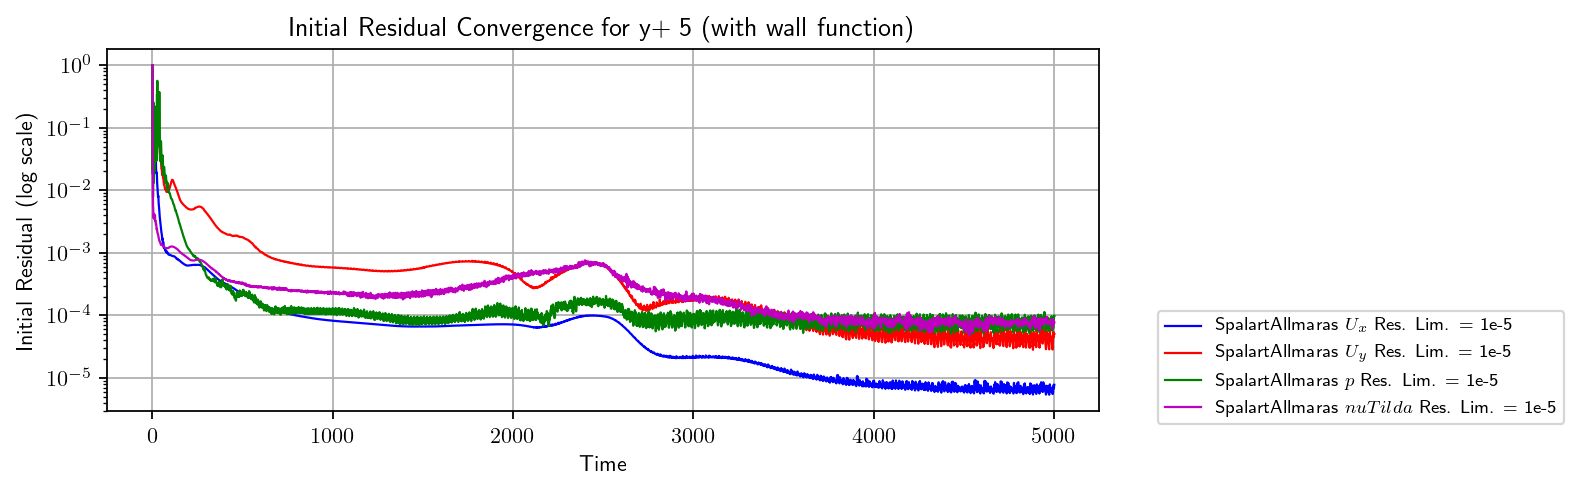

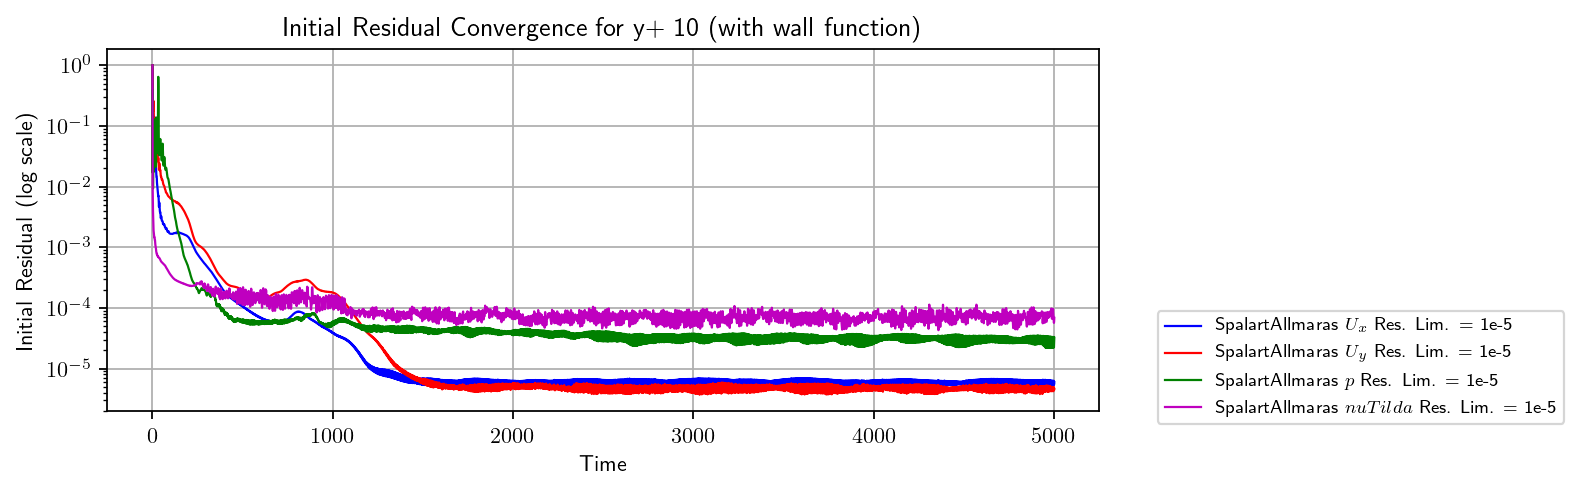

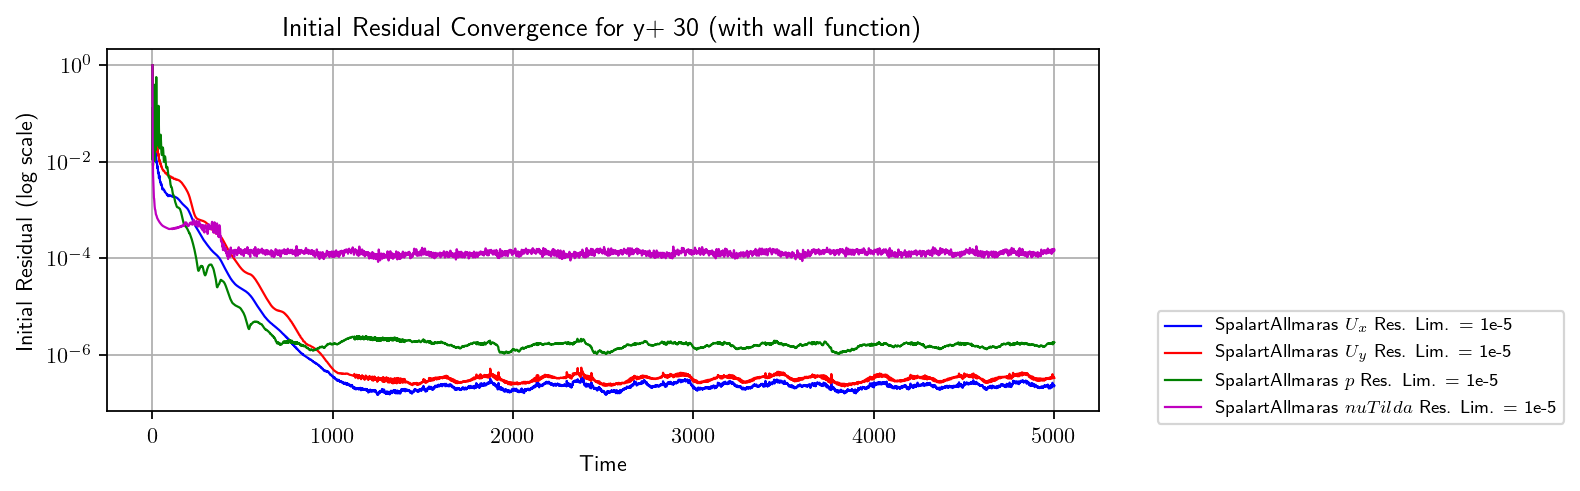

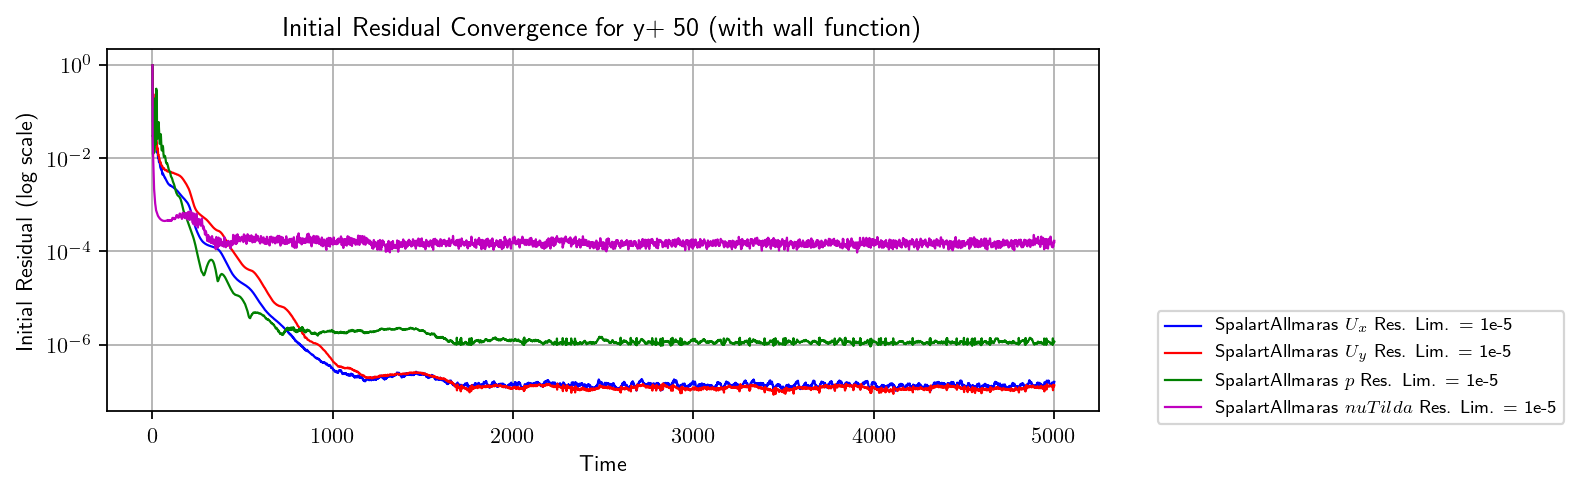

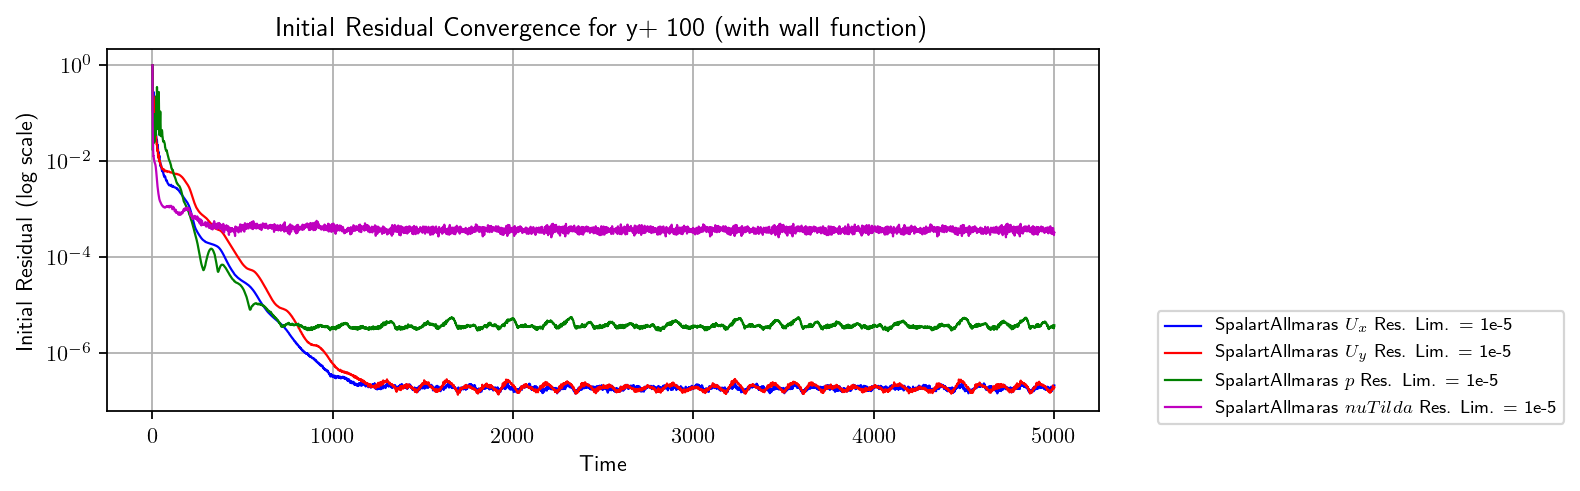

In [13]:
lw2 = 1.0
for j in range(len(yp)):
    for i in range(len(res_list)):
        fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence for y+ {} (with wall function)".format(yp[j]))
        ax2.set_xlabel("Time")
        ax2.set_ylabel("Initial Residual (log scale)")
        ax2.plot(t2[i + len(res_list)*j], Ux_init_res2[i + len(res_list)*j], color = 'b', label = "{} $U_x$ Res. Lim. = {}".format(model, res_list[i]), lw = lw2)
        ax2.plot(t2[i + len(res_list)*j], Uy_init_res2[i + len(res_list)*j], color = 'r', label = "{} $U_y$ Res. Lim. = {}".format(model, res_list[i]), lw = lw2)
        ax2.plot(t2[i + len(res_list)*j], p_init_res2[i + len(res_list)*j], color = 'g', label = "{} $p$ Res. Lim. = {}".format(model, res_list[i]), lw = lw2)
        ax2.plot(t2[i + len(res_list)*j], nuTilda_init_res2[i + len(res_list)*j], color = 'm', label = "{} $nuTilda$ Res. Lim. = {}".format(model, res_list[i]), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.3))        